# Veri Görselleştirme


## Veri Görselleştirmede Kullanılan Kütüphaneler

* Matplotlib
* Pandas
* Seaborn
* ggplot
* Plotly
* Bokeh

## Veriye İlk Bakış

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
# Veri setinin hikayesi nedir?
df = planets.copy()
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [6]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Eksik Değerlerin İncelemesi

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

## Kategorik Değişken Özetleri

In [12]:
kat_df = df.select_dtypes(include= ["category"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [13]:
# Kaç farklı grup var
kat_df.value_counts().count()

10

In [14]:
# Frekanslarının gözlenmesi
kat_df.value_counts()

method                       
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
dtype: int64

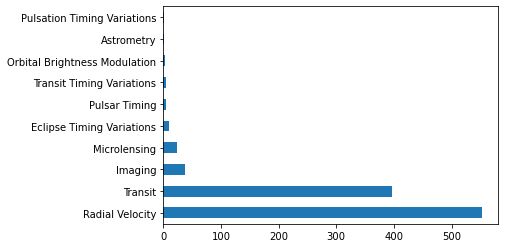

In [15]:
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özetleri

In [16]:
num_df = df.select_dtypes(include=["float64", "int64"])
num_df.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [17]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


## Dağılım Grafikleri

### Barplot

Kategorik değişkelerin görselleştirlimesi için kullanılır.

In [18]:
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [21]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [22]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [23]:
# Ordinal tanımlama 
from pandas.api.types import CategoricalDtype
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [24]:
df.cut = df.cut.astype(CategoricalDtype(ordered= True))
df.cut.head(2)

0      Ideal
1    Premium
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [25]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(ordered=True, categories = cut_categories))
df.cut.head(2)

0      Ideal
1    Premium
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [26]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [27]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [28]:
color_categories = ["D", "E", "F", "G", "H", "I", "J"][::-1]
df.color = df.color.astype(CategoricalDtype(ordered=True, categories=color_categories))
df.color.head(2)

0    E
1    E
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [29]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [30]:
clarity_categories = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df.clarity = df.clarity.astype(CategoricalDtype(ordered=True, categories= clarity_categories))
df.clarity.head(2)

0    SI2
1    SI1
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

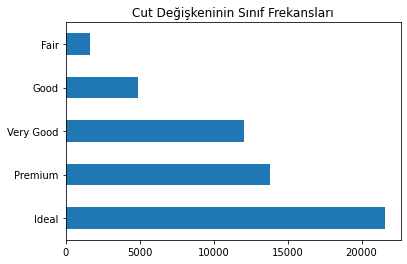

In [31]:
# barplot (pandas)
(df.cut
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

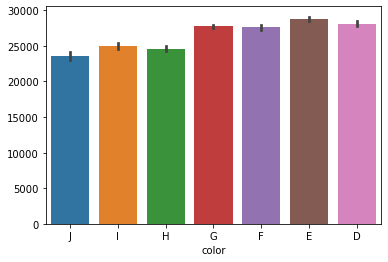

In [32]:
# barplot (seaborn)
sns.barplot(x="color", y=df.color.index, data=df);

<AxesSubplot:xlabel='clarity'>

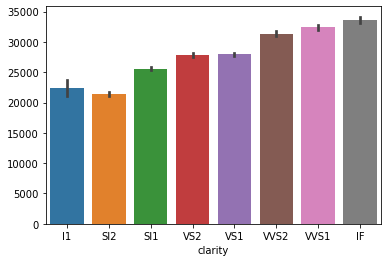

In [33]:
sns.barplot(x="clarity", y=df.clarity.index, data=df)

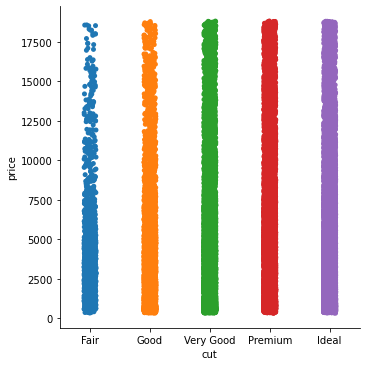

In [34]:
sns.catplot(x="cut", y="price", data=df);

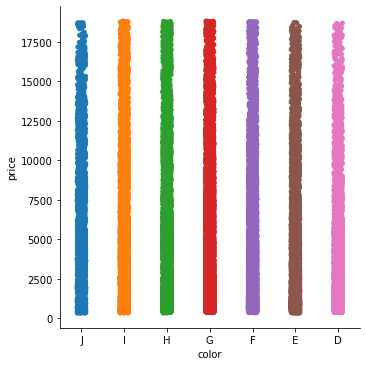

In [35]:
sns.catplot(x="color", y="price", data=df);

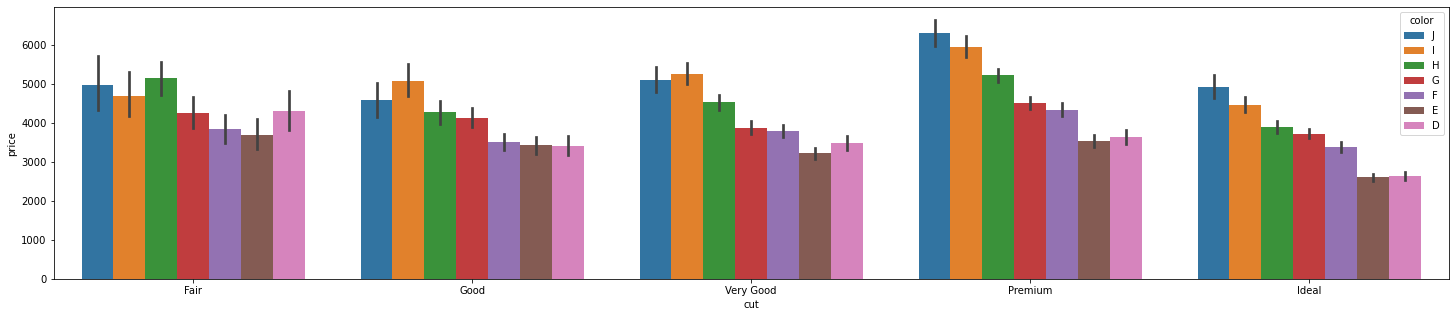

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
sns.barplot(x = "cut", y = "price", hue = "color", data = df)
plt.show()

In [37]:
# hue arka planda groupby işlemi yapar 
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       J        4975.655462
           I        4685.445714
           H        5135.683168
           G        4239.254777
           F        3827.003205
           E        3682.312500
           D        4291.061350
Good       J        4574.172638
           I        5078.532567
           H        4276.254986
           G        4123.482204
           F        3495.750275
           E        3423.644159
           D        3405.382175
Very Good  J        5103.513274
           I        5255.879568
           H        4535.390351
           G        3872.753806
           F        3778.820240
           E        3214.652083
           D        3470.467284
Premium    J        6294.591584
           I        5946.180672
           H        5216.706780
           G        4500.742134
           F        4324.890176
           E        3538.914420
           D        3631.292576
Ideal      J        4918.186384
           I        4451.970377
           H        388

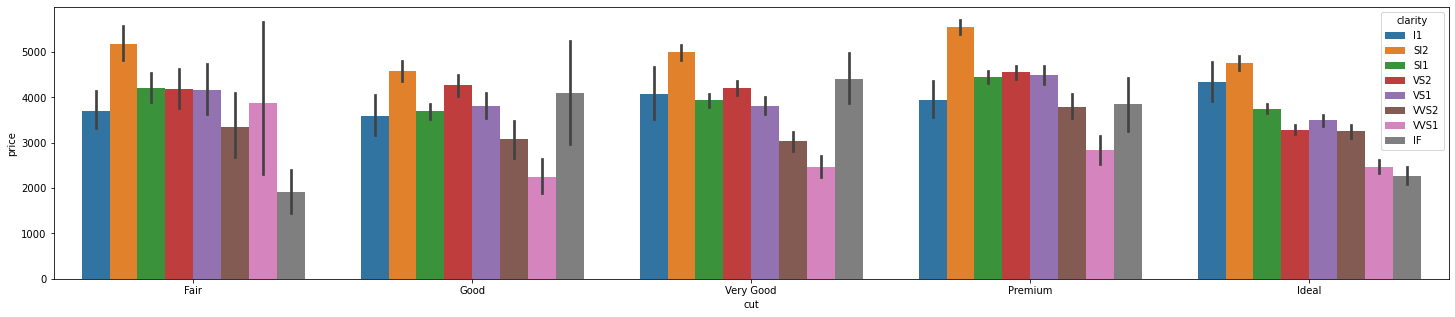

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
sns.barplot(x = "cut", y = "price", hue = "clarity", data = df)
plt.show()

In [39]:
# hue arka planda groupby işlemi yapar 
df.groupby(["cut", "clarity"])["price"].mean()

cut        clarity
Fair       I1         3703.533333
           SI2        5173.916309
           SI1        4208.279412
           VS2        4174.724138
           VS1        4165.141176
           VVS2       3349.768116
           VVS1       3871.352941
           IF         1912.333333
Good       I1         3596.635417
           SI2        4580.260870
           SI1        3689.533333
           VS2        4262.236196
           VS1        3801.445988
           VVS2       3079.108392
           VVS1       2254.774194
           IF         4098.323944
Very Good  I1         4078.226190
           SI2        4988.688095
           SI1        3932.391049
           VS2        4215.759552
           VS1        3805.353239
           VVS2       3037.765182
           VVS1       2459.441065
           IF         4396.216418
Premium    I1         3947.331707
           SI2        5545.936928
           SI1        4455.269371
           VS2        4550.331248
           VS1        4485.46

### Histogram ve Yoğunluk

- Sayısal değişkenler için kullanılır.
- Sürekli değikenlerin dağılımı ile ilgili bilgi verir.

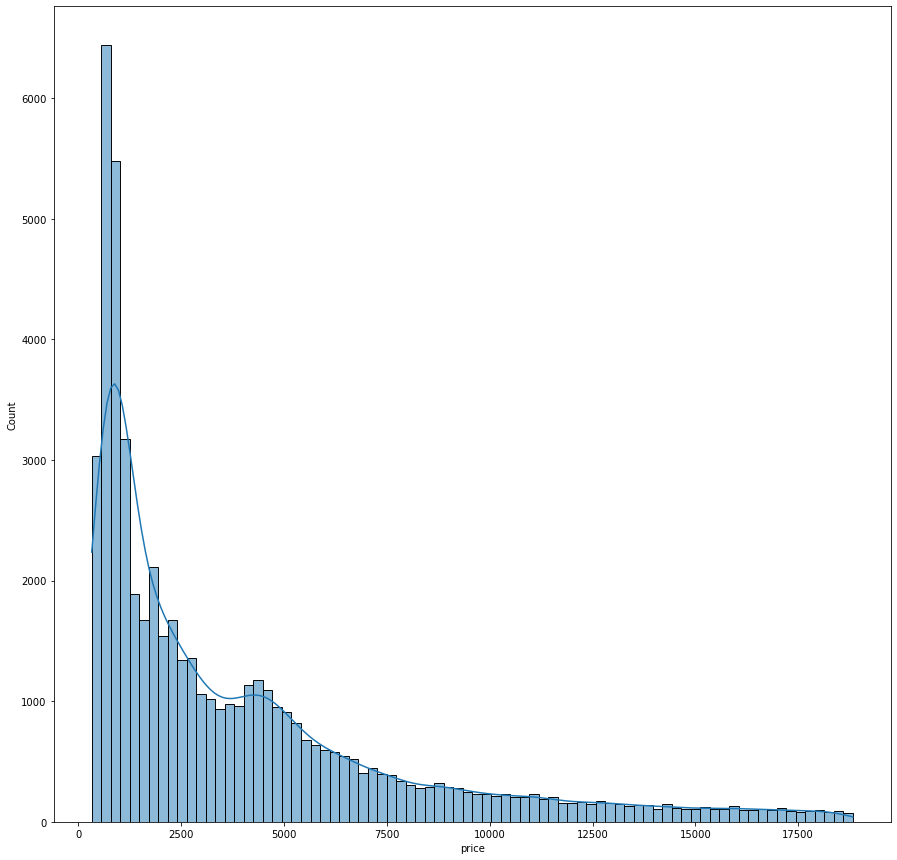

In [40]:
plt.figure(figsize=(15,15))
sns.histplot(df.price, kde = True)
plt.show()

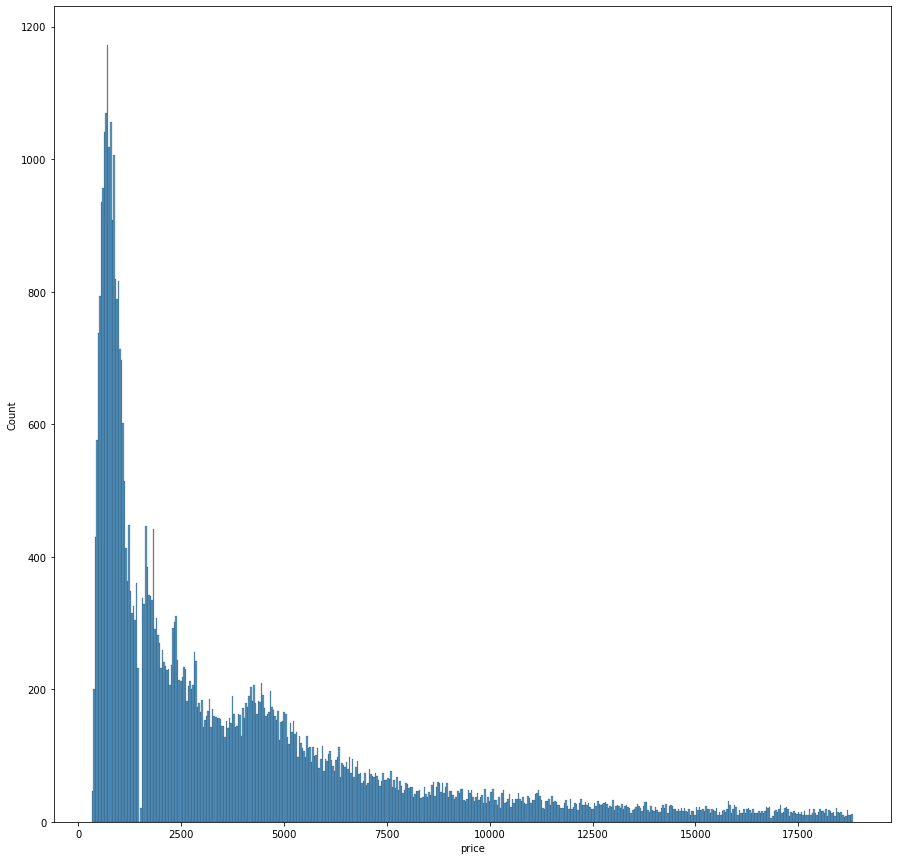

In [41]:
plt.figure(figsize=(15,15))
sns.histplot(df.price, kde = False, bins = 500)
plt.show()

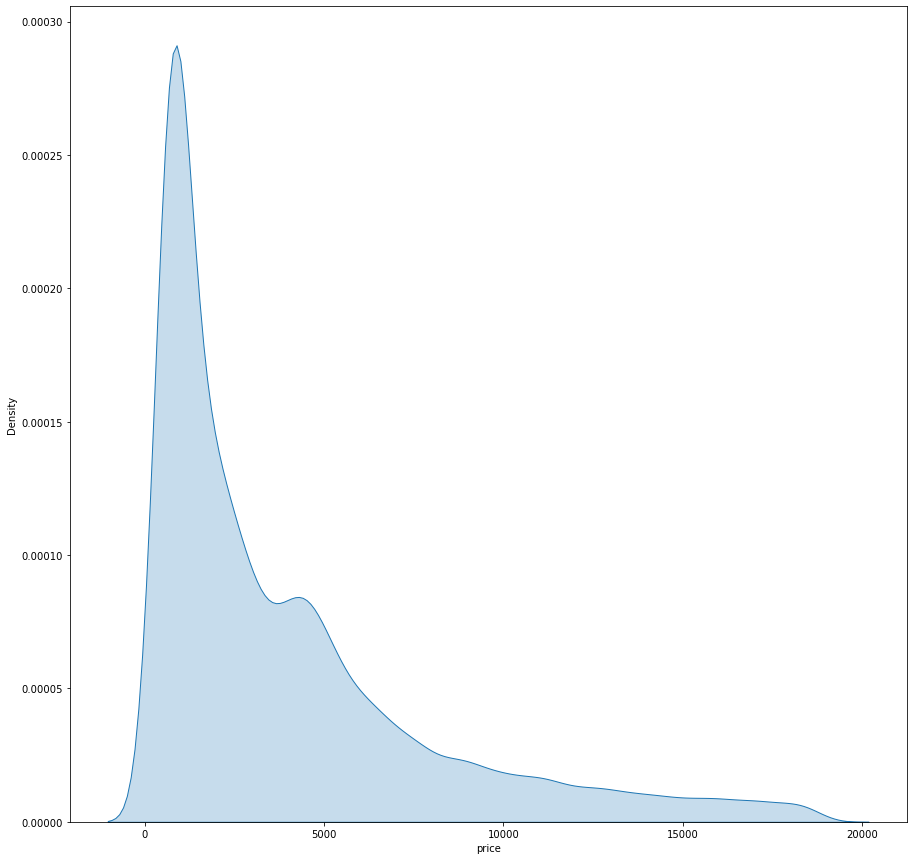

In [42]:
plt.figure(figsize=(15,15))
sns.kdeplot(df.price, shade = True)
plt.show()

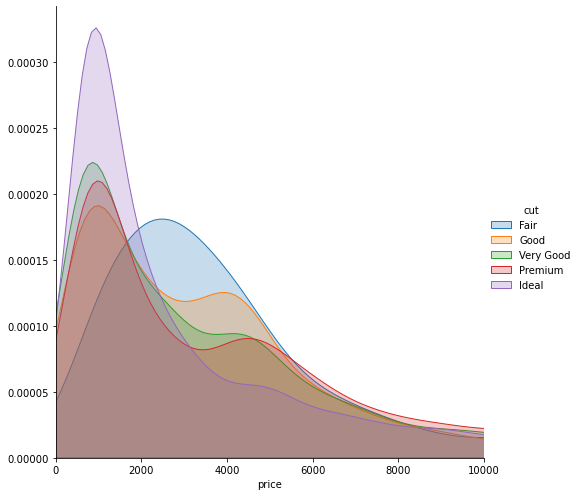

In [43]:
(sns
 .FacetGrid(df,
               hue = "cut",
               height= 7,
               xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

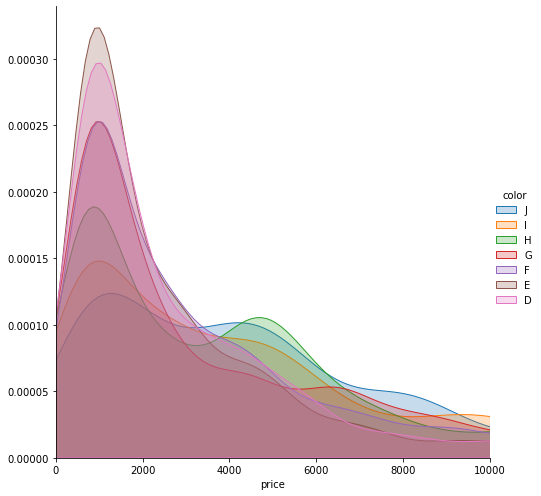

In [44]:
(sns
 .FacetGrid(df,
               hue = "color",
               height= 7,
               xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

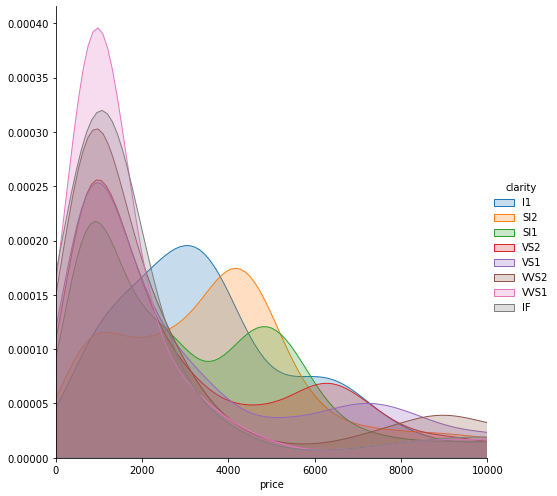

In [45]:
(sns
 .FacetGrid(df,
               hue = "clarity",
               height= 7,
               xlim = (0,10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

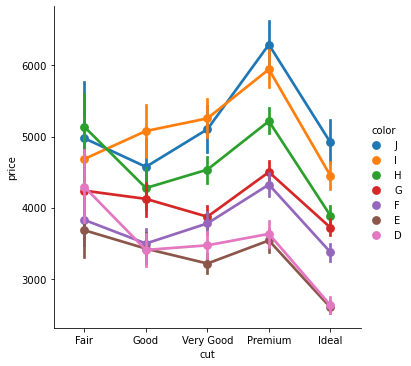

In [46]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point" , data = df);

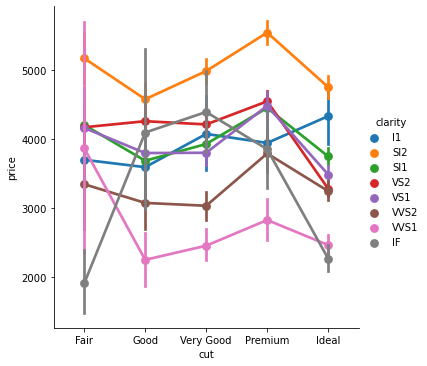

In [47]:
sns.catplot(x = "cut", y = "price", hue = "clarity", kind = "point" , data = df);

### Boxplot

- Sayısal değişkenler için kullanılır.
- Çeyrekler aracılığıyla veri hakkında detaylı bilgi sunar.
- Aykırı değerleri gözlemlememizi sağlar.

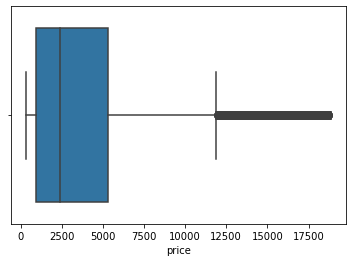

In [48]:
sns.boxplot(x = df["price"]);

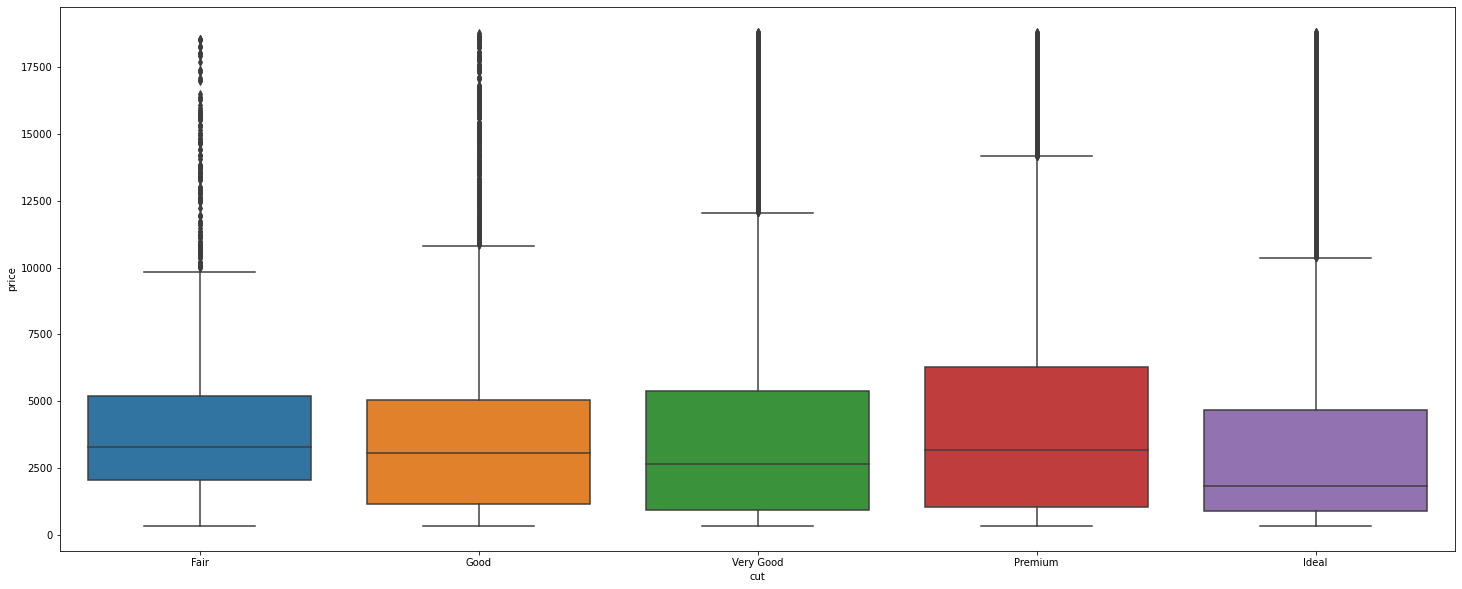

In [49]:
plt.figure(figsize = (25, 10))
sns.boxplot(x = "cut", y = "price", data = df);

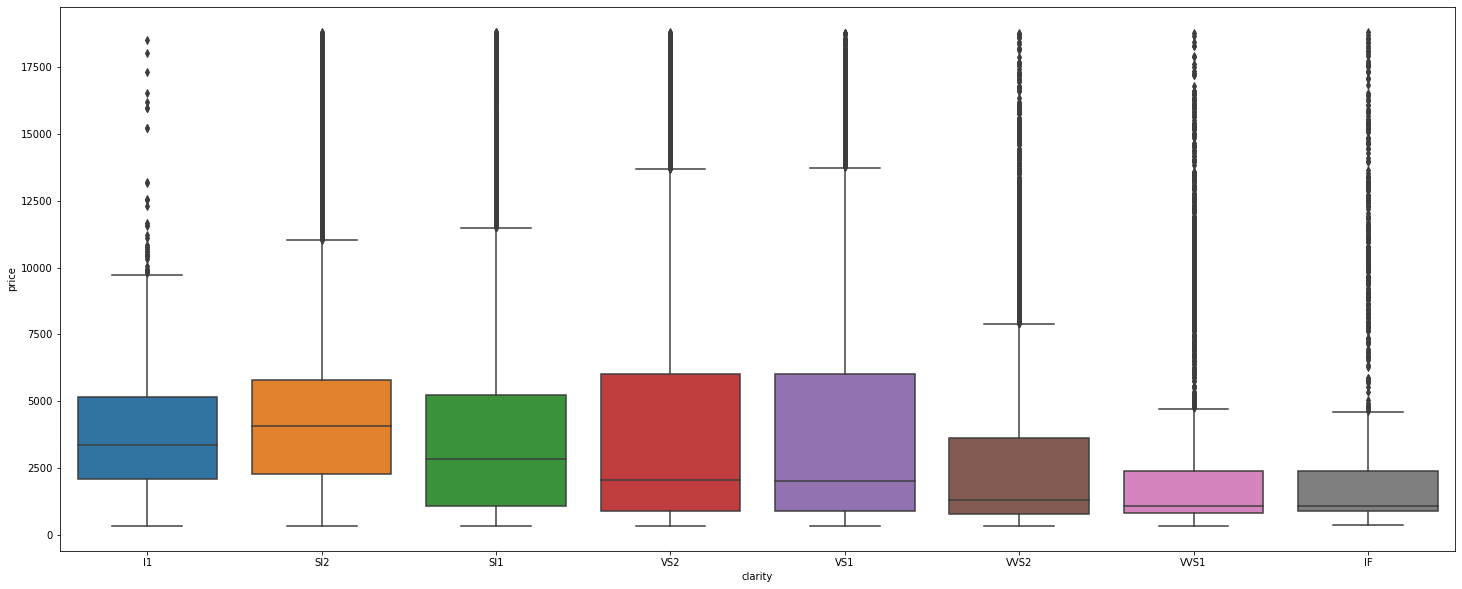

In [50]:
plt.figure(figsize = (25, 10))
sns.boxplot(x = "clarity", y = "price", data = df);

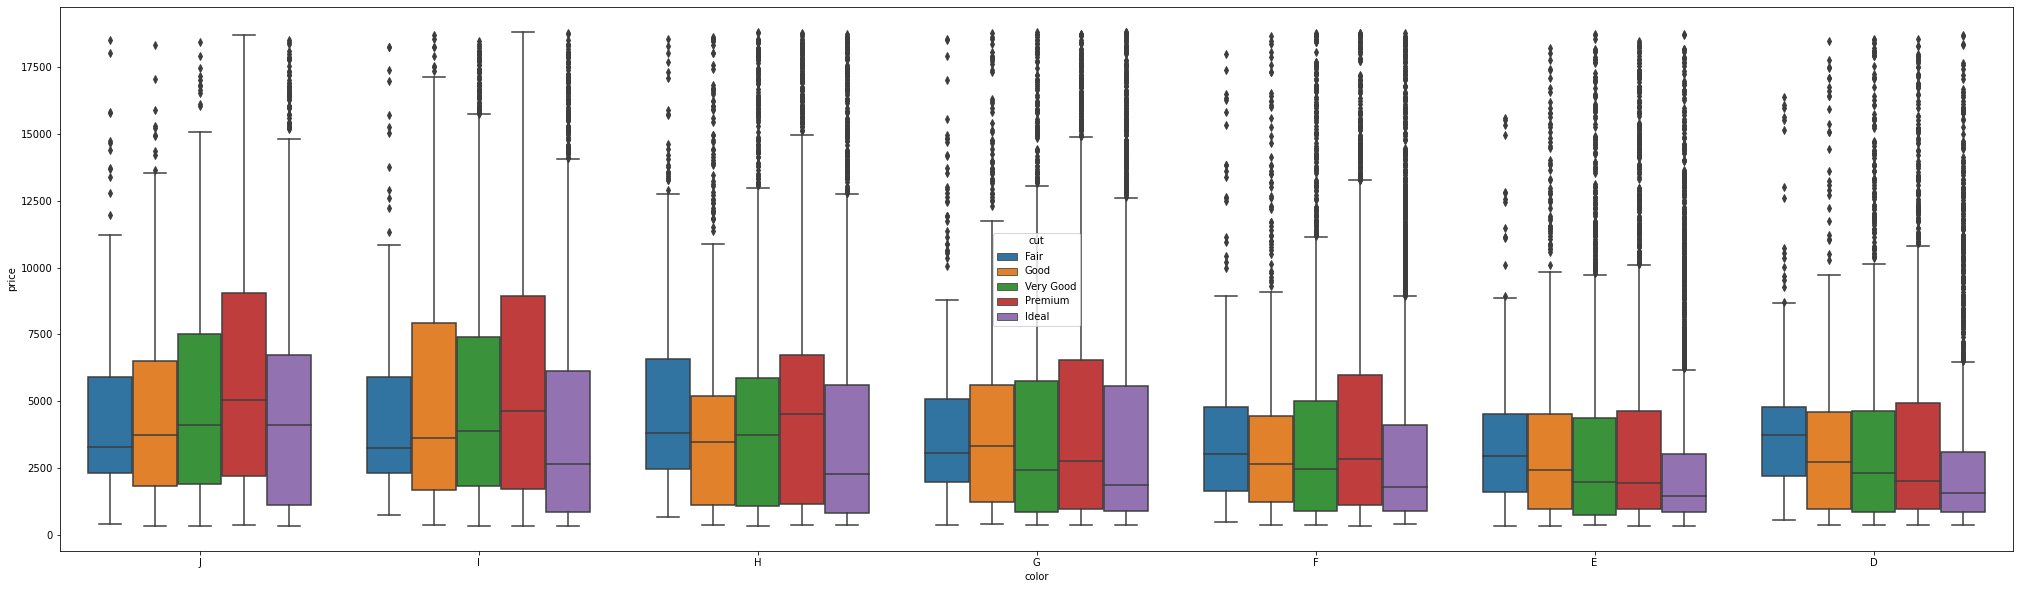

In [51]:
plt.figure(figsize = (35, 10))
sns.boxplot(x = "color", y = "price", hue = "cut", data = df);

### Violin

- Dağılım hakkında da bilgi verir.

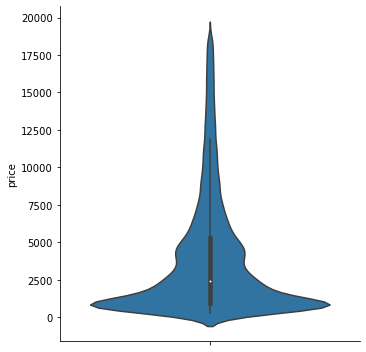

In [52]:
sns.catplot(y = "price", kind = "violin", data = df);

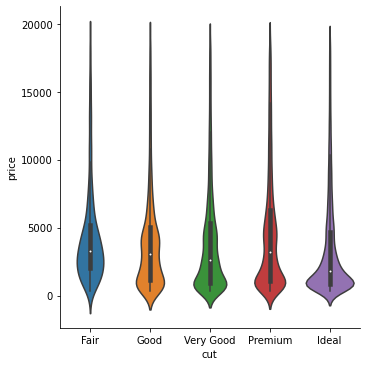

In [53]:
sns.catplot(x = "cut", y = "price", kind = "violin", data = df);

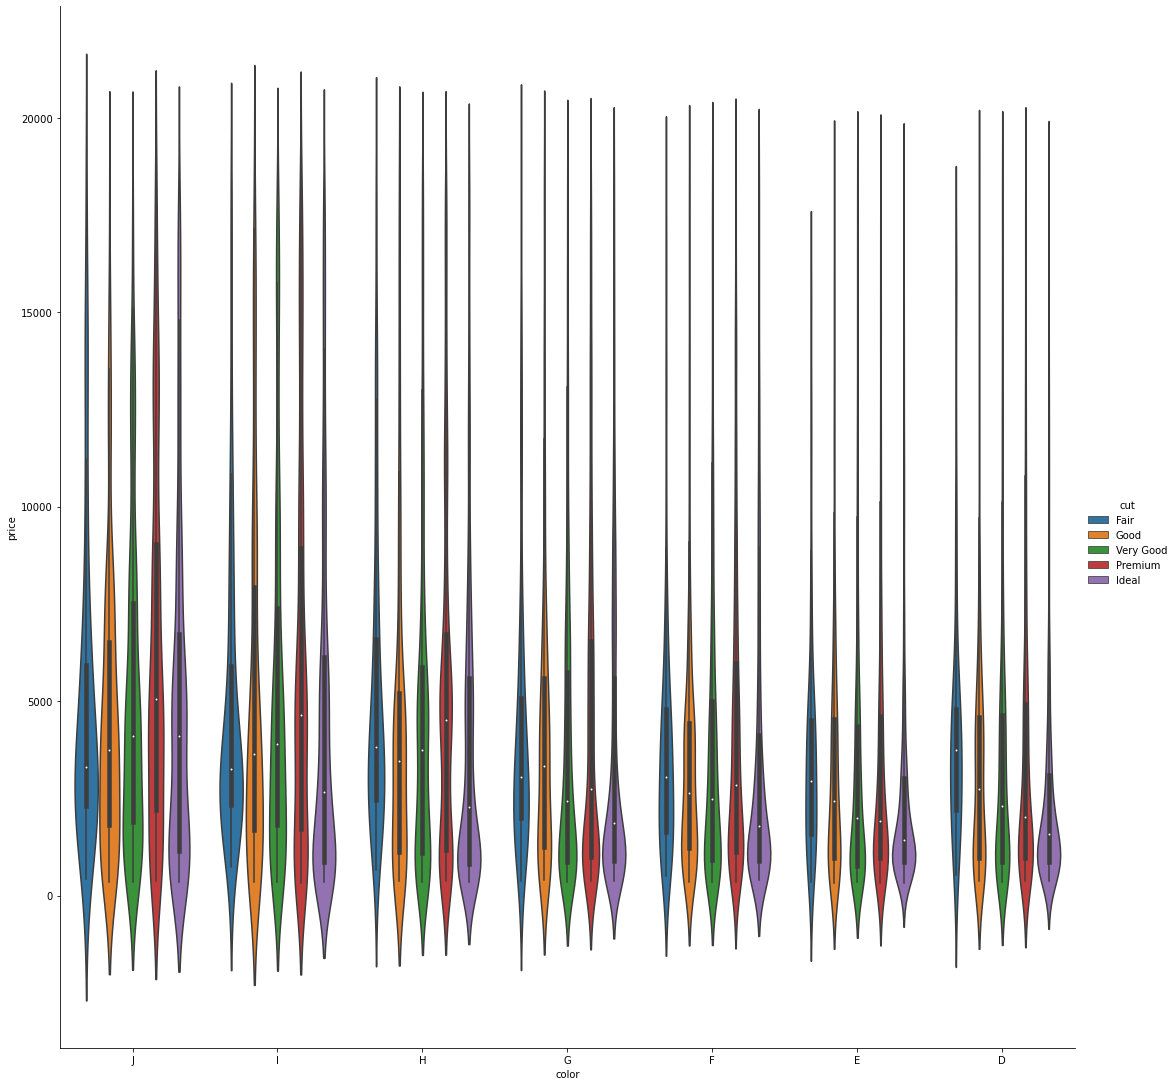

In [54]:
sns.catplot(x = "color", y = "price", hue = "cut", kind = "violin", data = df, height = 15, aspect = 1);

### Korelasyon Grafikleri

- İki değişken arasındaki ilişki hakkında bilgi verir.

#### Scatter Plot

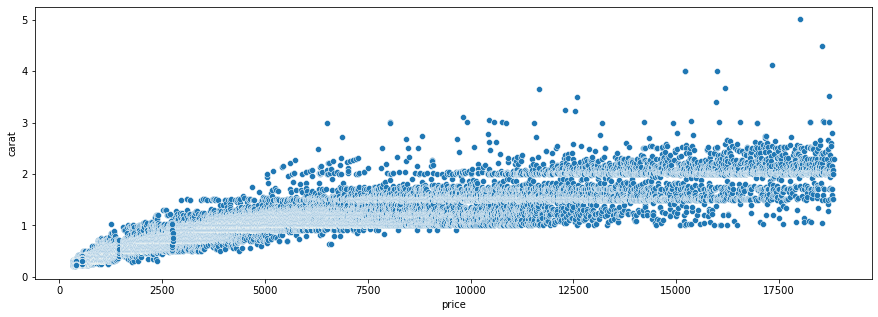

In [55]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "price", y = "carat", data = df);

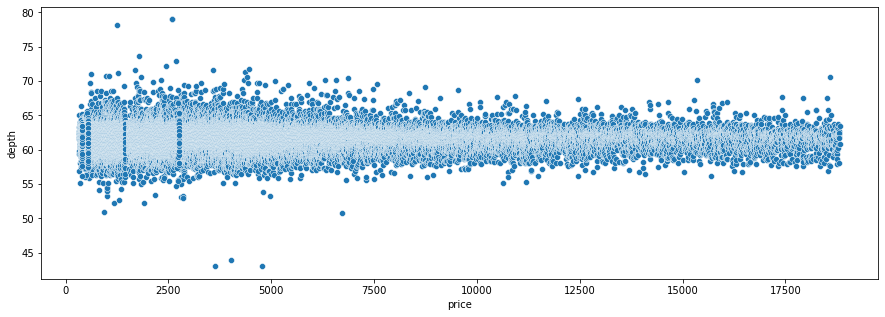

In [56]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "price", y = "depth" , data = df);

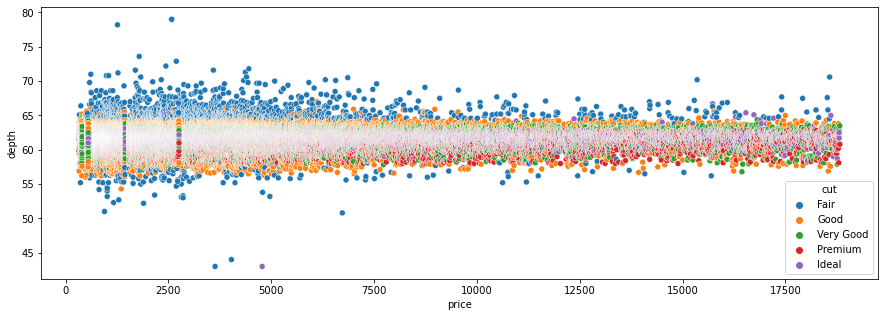

In [57]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "price", y = "depth" , hue = "cut", data = df);

### Doğrusal İlişkinin 

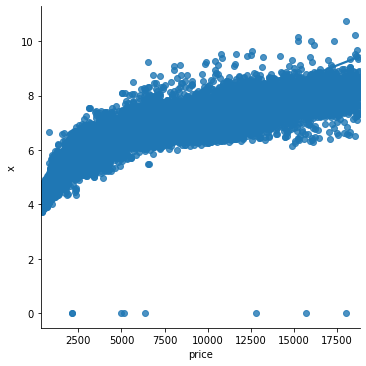

In [58]:
sns.lmplot(x = "price", y = "x", data = df);

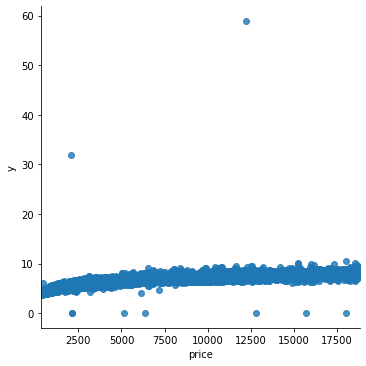

In [59]:
sns.lmplot(x = "price", y = "y", data = df);

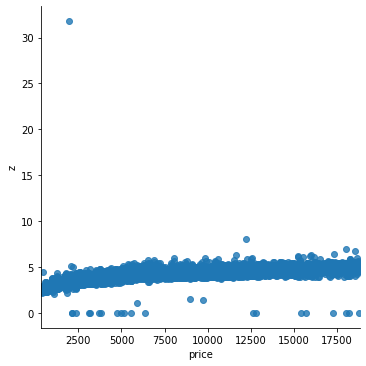

In [60]:
sns.lmplot(x = "price", y = "z", data = df);

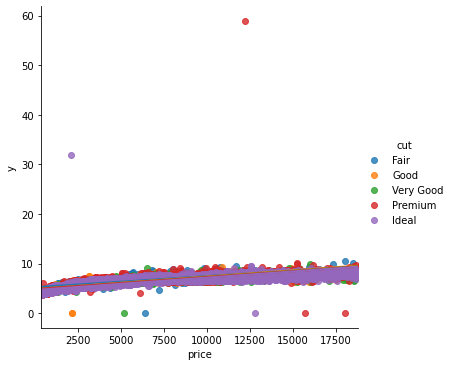

In [61]:
sns.lmplot(x = "price", y = "y", hue = "cut", data = df);

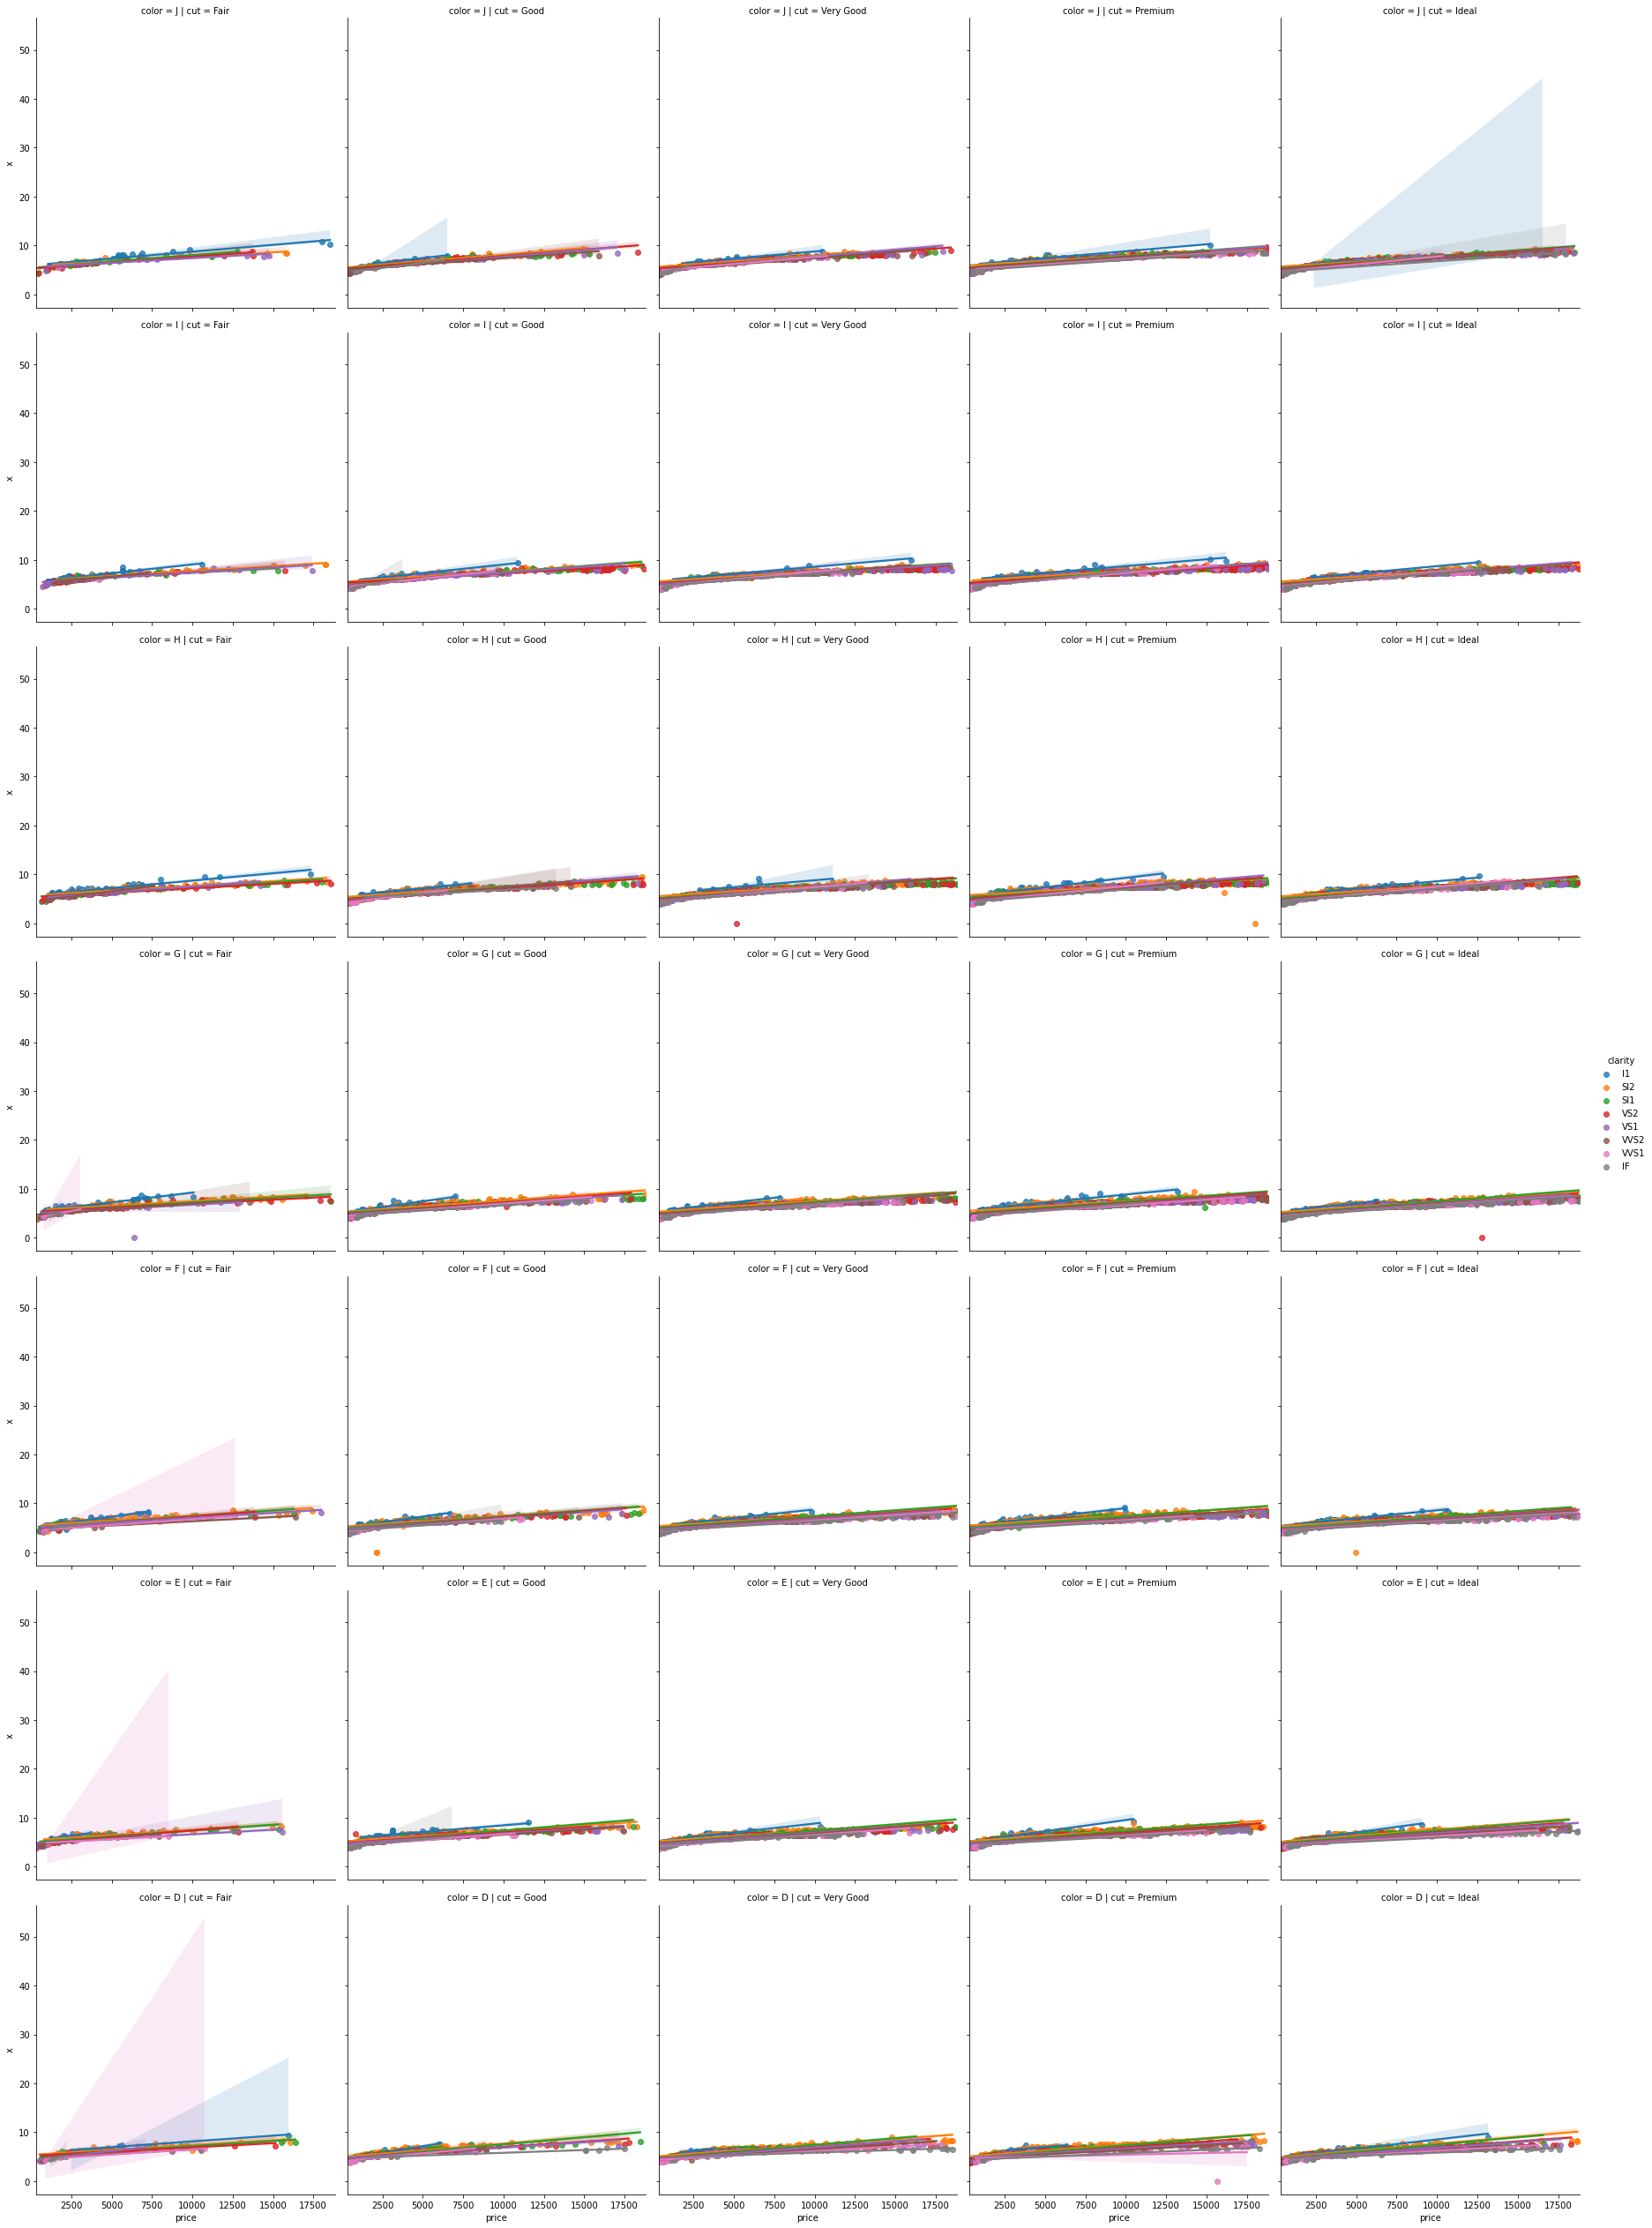

In [62]:
sns.lmplot(x = "price", y = "x", hue = "clarity", row = "color", col="cut", data = df, height=5);

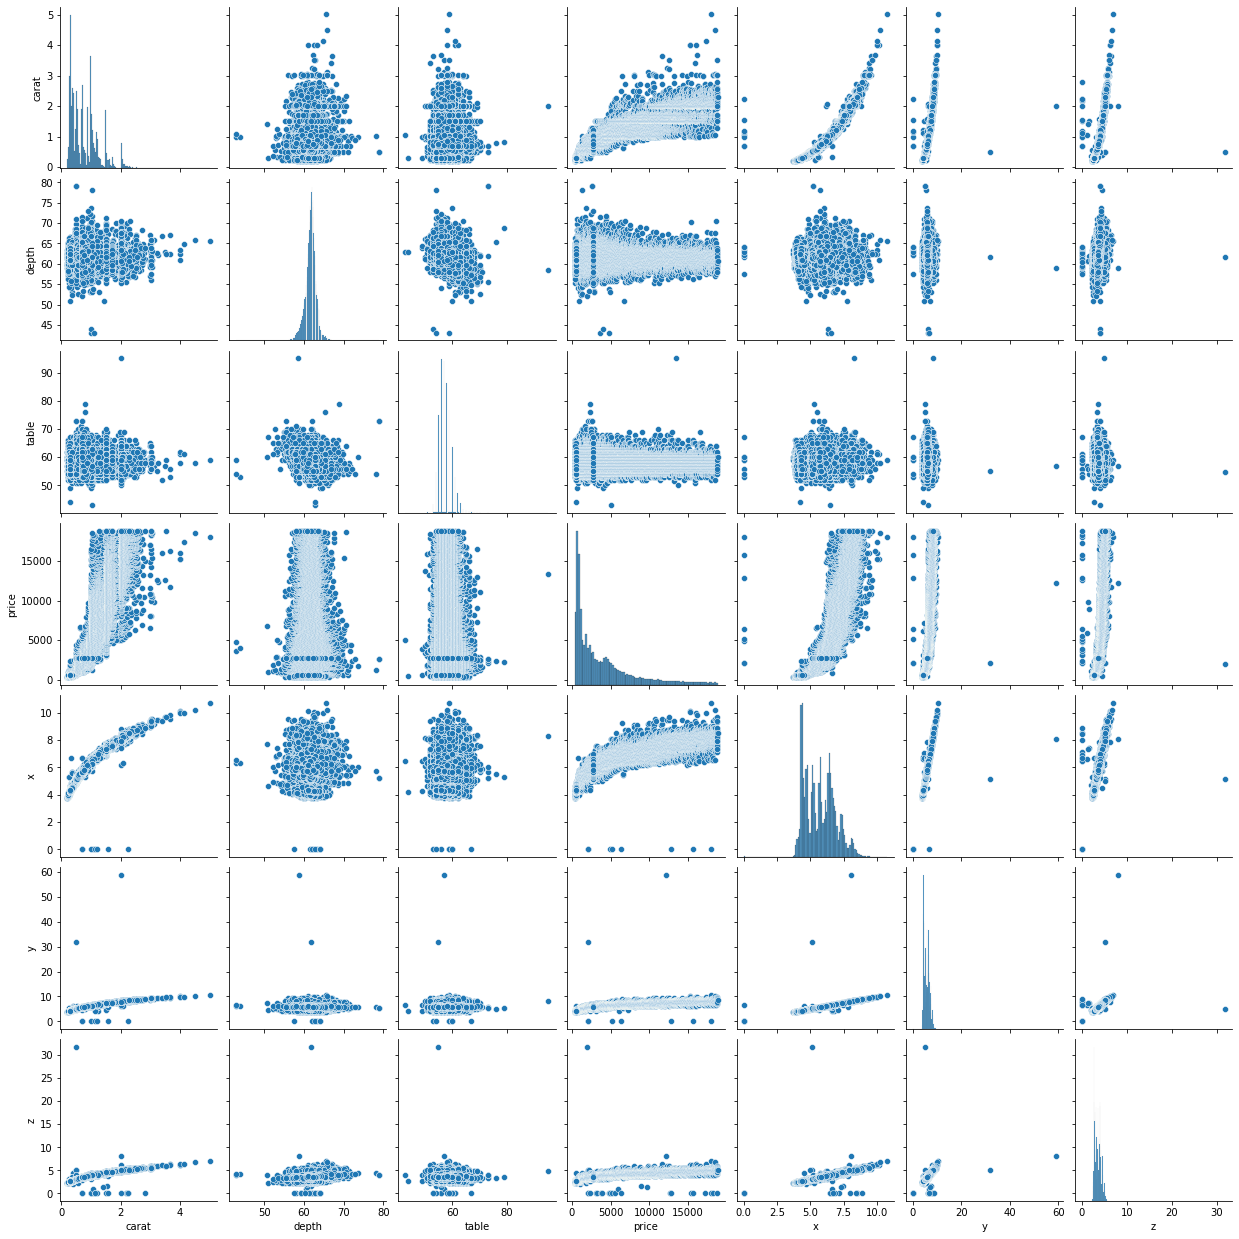

In [63]:
sns.pairplot(df);

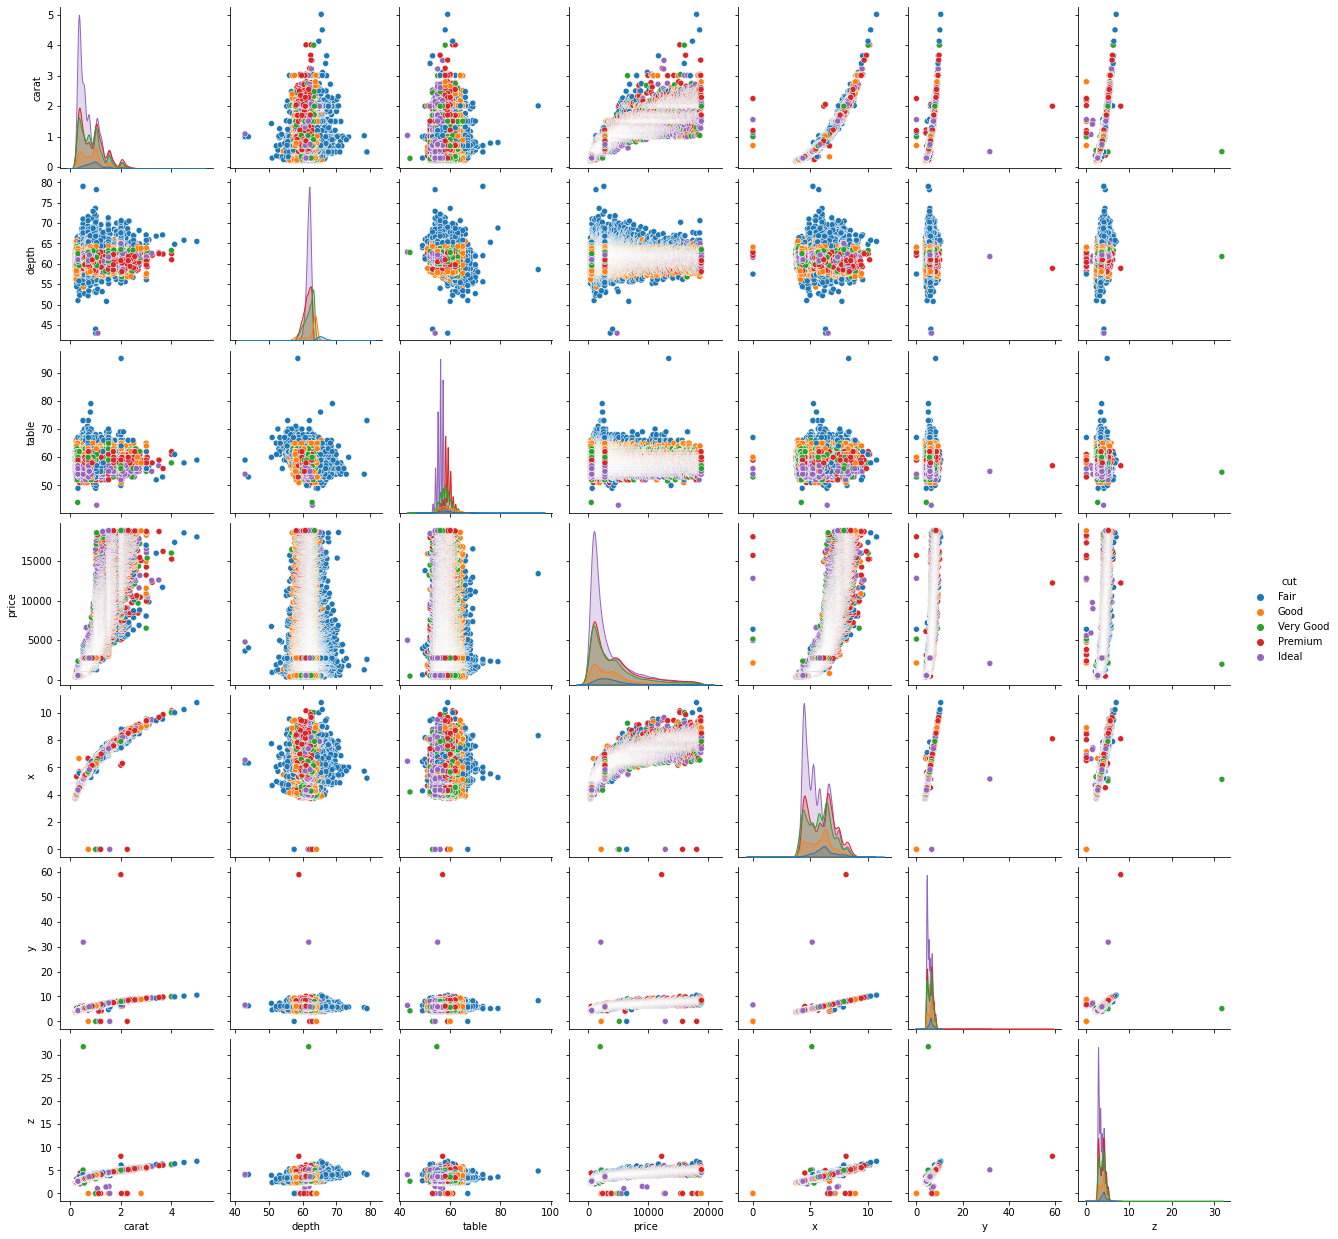

In [64]:
sns.pairplot(df, hue="cut");

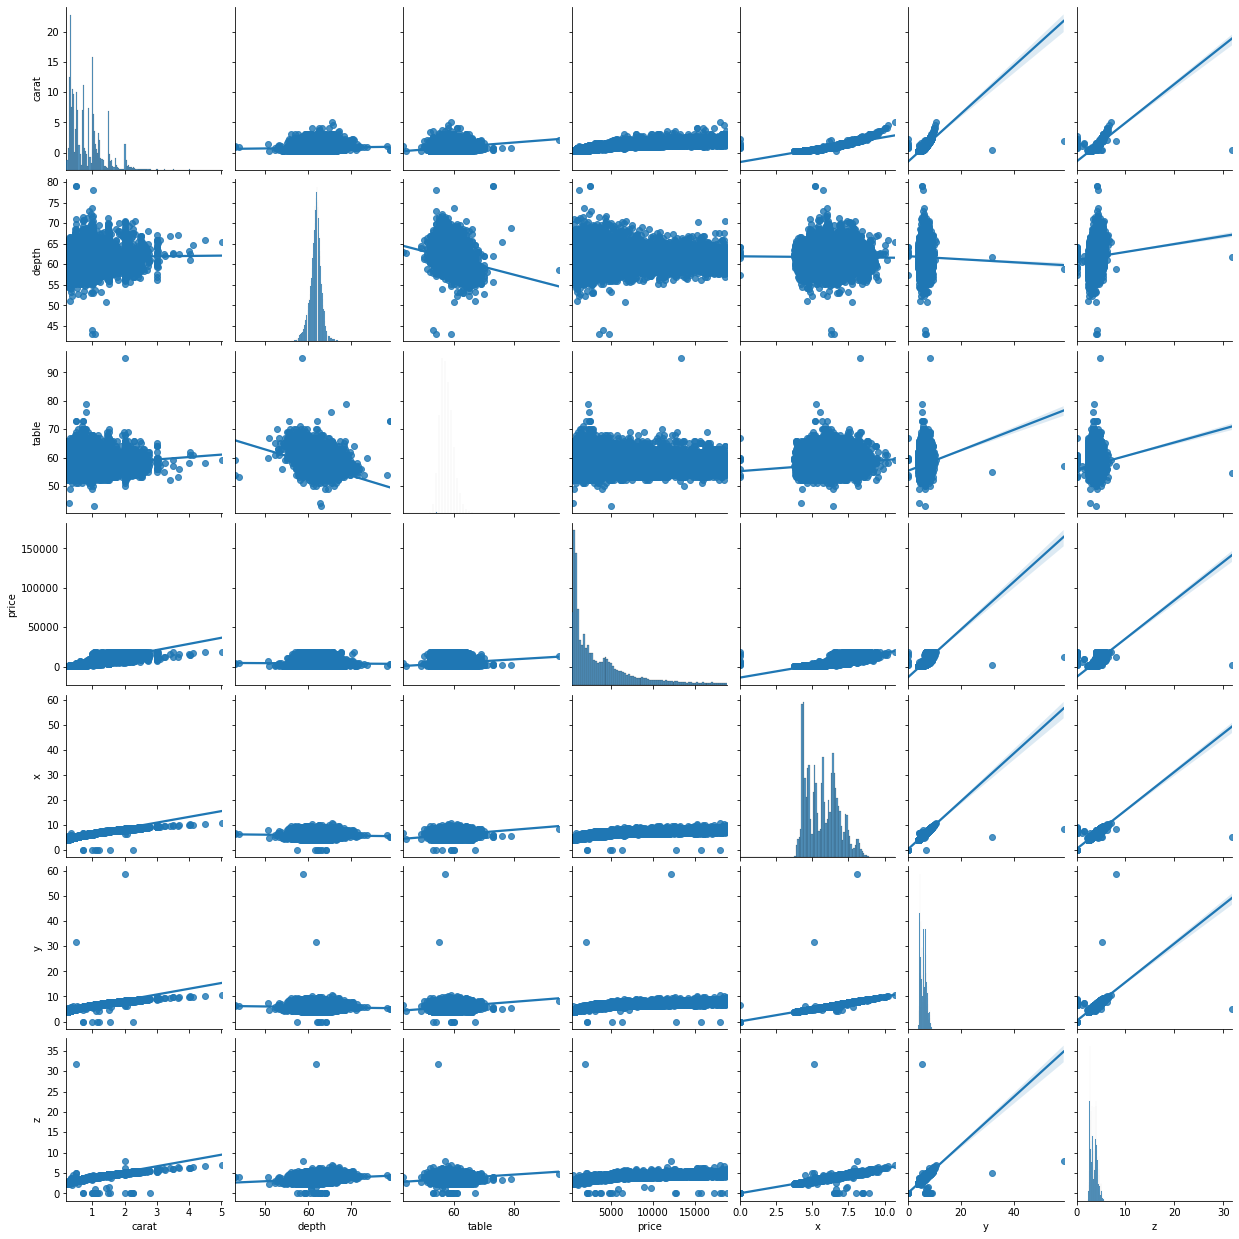

In [65]:
sns.pairplot(df, kind="reg");

### Heatmap

In [66]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [68]:
df = df.pivot("month", "year", "passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


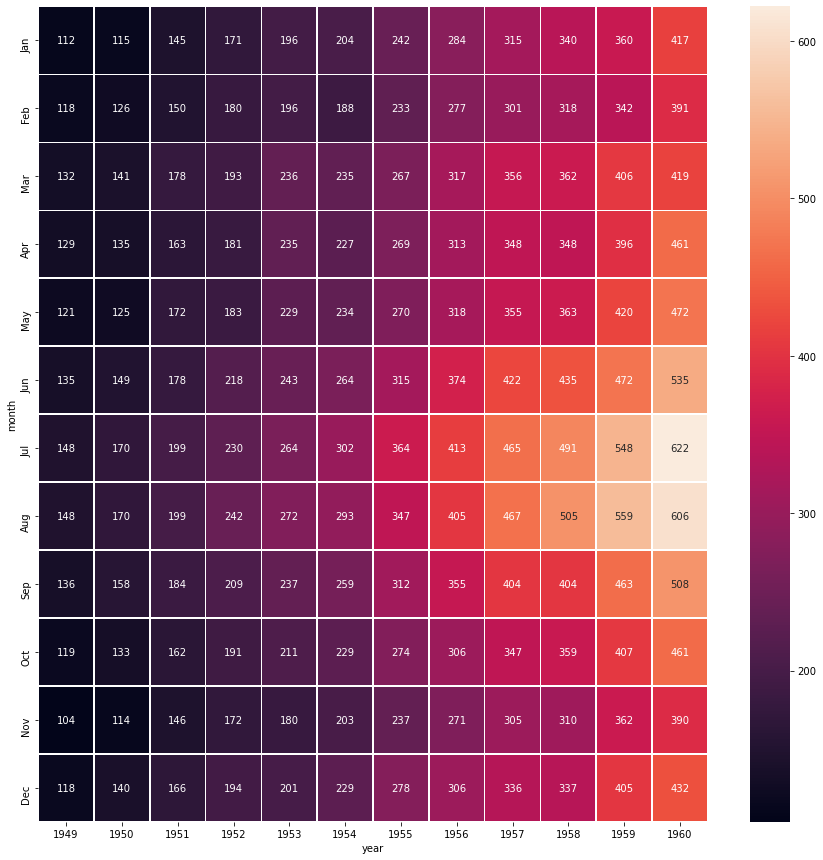

In [69]:
plt.figure(figsize = (15,15))
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5);

### Çizgi Grafiği

- Zaman bağlı değişkenlerin oluşturduğu veri setlerinde kullanılır.
- Iot verilerini görselleştirmek için kullanılabilit.

In [70]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [72]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [73]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [74]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [75]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [76]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


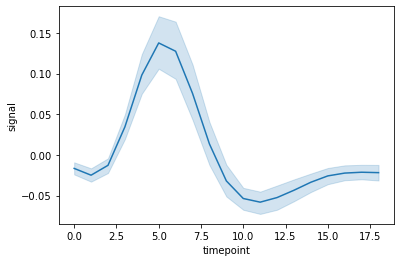

In [77]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

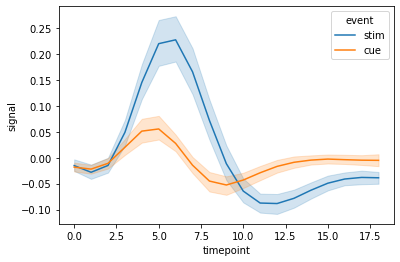

In [78]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

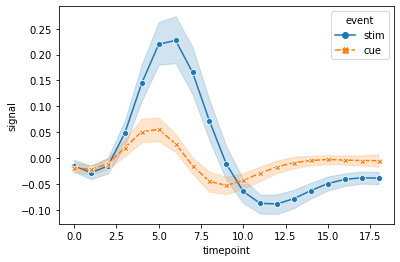

In [79]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style= "event",
             markers = True, 
             data = df);

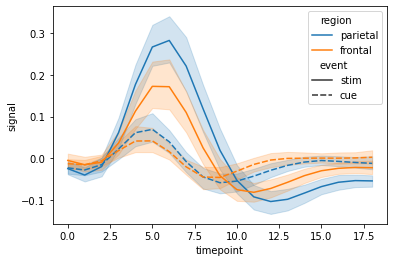

In [80]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style= "event",
             data = df);

### Basit Zaman Serisi Grafiği

In [81]:
import pandas_datareader as pr

In [82]:
df = pr.get_data_yahoo("AAPL", start = "2015-01-01", end = "2021-01-01")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539


In [83]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.520477
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020


In [84]:
df.shape

(1511, 6)

In [85]:
df_close = df["Close"]
df_close.head()

Date
2015-01-02    27.332500
2015-01-05    26.562500
2015-01-06    26.565001
2015-01-07    26.937500
2015-01-08    27.972500
Name: Close, dtype: float64

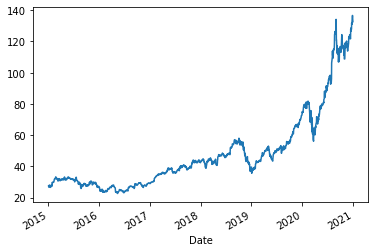

In [86]:
df_close.plot();

In [87]:
df_close.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1511, freq=None)

In [88]:
# Değişkenin tipi datetime türünde değilse uygulanır
# df_close.index = pd.DatetimeIndex(df_close.index)

---------------------

<a id=14></a>
### Kaynaklar

#### Kurslar

- https://www.udemy.com/course/python-egitimi/
